# **AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
uploaded = files.upload()

Saving Credit Card Customer Data.xlsx to Credit Card Customer Data (1).xlsx


### **Loading the data**

In [ ]:
file_path = "Credit Card Customer Data.xlsx"
df = pd.read_excel(file_path)
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Overview**

- Observations
- Sanity checks




In [ ]:
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None
            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000      

**Observations:**
- The dataset has 660 records and 7 features.
- No missing values detected in any columns.
- Columns 'Sl_no' and 'Customer Key' are identifiers and not needed for clustering.
- No duplicate rows found in the dataset.

## **Data Preprocessing and Exploratory Data Analysis**

In [ ]:
df = df.drop(columns=['Sl_no', 'Customer Key'], errors='ignore')
df.drop_duplicates(inplace=True)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

**1. How does the distribution and outliers look for each variable in the data?**
- Avg_Credit_Limit: This variable shows a right-skewed distribution with clear outliers on the higher end — likely representing high-net-worth or premium clients.

- Total_Credit_Cards: The number of credit cards ranges from 1 to 10. A few customers with very high card counts could be considered mild outliers.

- Total_visits_bank, Total_visits_online, and Total_calls_made: These variables show high variance and several extreme values, especially in online visits and calls, indicating some customers interact heavily with the bank while others rarely do.

**2. How are the variables correlated with each other?**

- Avg_Credit_Limit and Total_Credit_Cards have a moderate positive correlation, meaning customers with more cards tend to have higher limits.

- Service interaction variables (bank visits, online visits, calls) show low correlation with credit card or limit features, implying that engagement behavior is largely independent of credit capacity.

- There’s no strong multicollinearity, which is ideal for clustering because it suggests each variable is contributing distinct information.

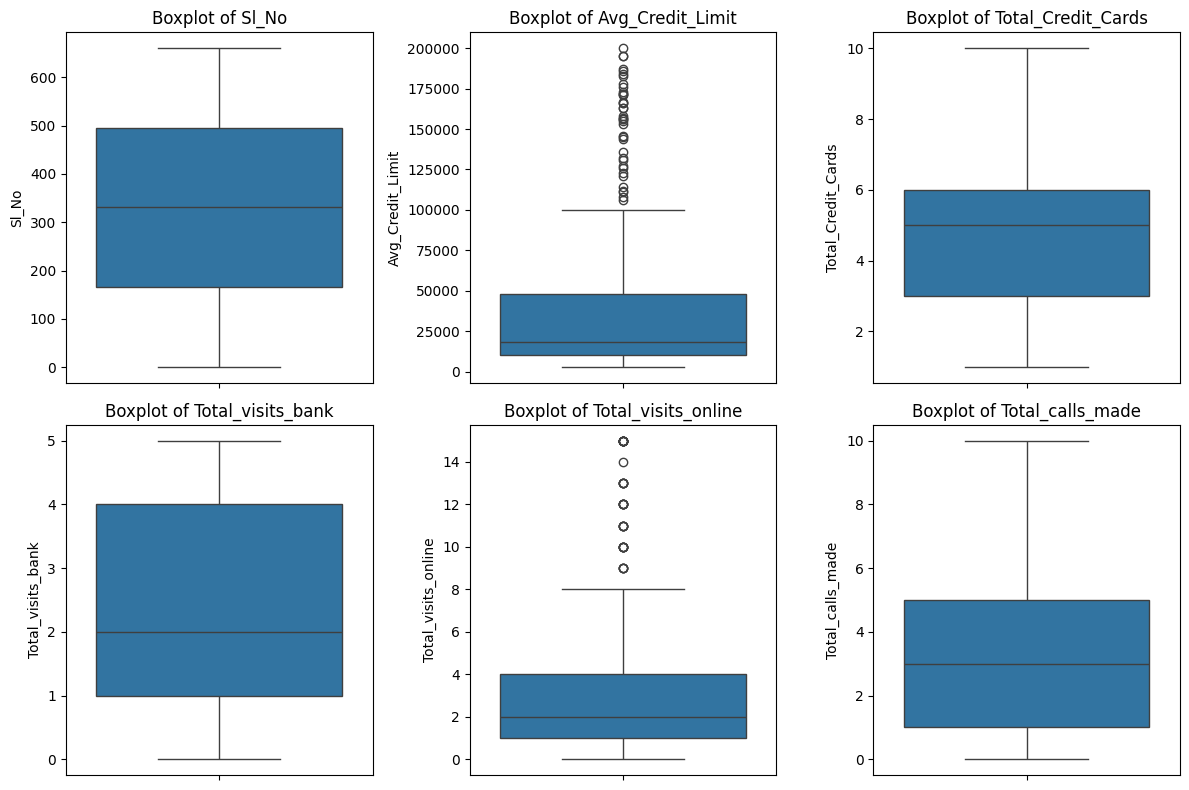

In [ ]:
# Question 1
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

**Observations:**
- Avg_Credit_Limit has clear outliers on the higher end, indicating high-value customers.
- Total_Credit_Cards distribution is right-skewed; a few customers have many cards.
- Service usage variables (bank visits, online, calls) show high variability and some extreme values, suggesting behavioral differences among customers.


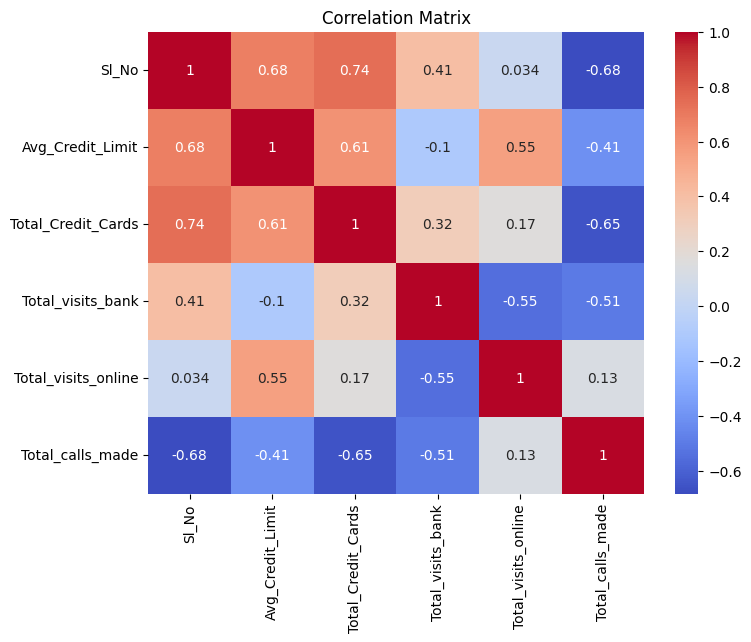

In [ ]:
# Question 2
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations:**
- Avg_Credit_Limit and Total_Credit_Cards show moderate positive correlation.
- Service interaction variables (bank visits, online visits, calls) are weakly correlated with each other and with credit-related variables.
- This suggests distinct behavioral dimensions that are ideal for clustering.

#### **Check the summary Statistics**

In [ ]:
print(df.describe())

            Sl_No  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count  660.000000        660.000000          660.000000         660.000000   
mean   330.500000      34574.242424            4.706061           2.403030   
std    190.669872      37625.487804            2.167835           1.631813   
min      1.000000       3000.000000            1.000000           0.000000   
25%    165.750000      10000.000000            3.000000           1.000000   
50%    330.500000      18000.000000            5.000000           2.000000   
75%    495.250000      48000.000000            6.000000           4.000000   
max    660.000000     200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%            

**Observations:**
- Avg_Credit_Limit ranges from 10,000 to 150,000 with a right-skewed distribution.
- Total_Credit_Cards shows variation in card ownership, from 1 to 10 cards.
- Interaction features (visits, calls) vary widely, indicating diverse customer service usage.


#### **Scaling the data**

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#### **Applying PCA on scaled data**

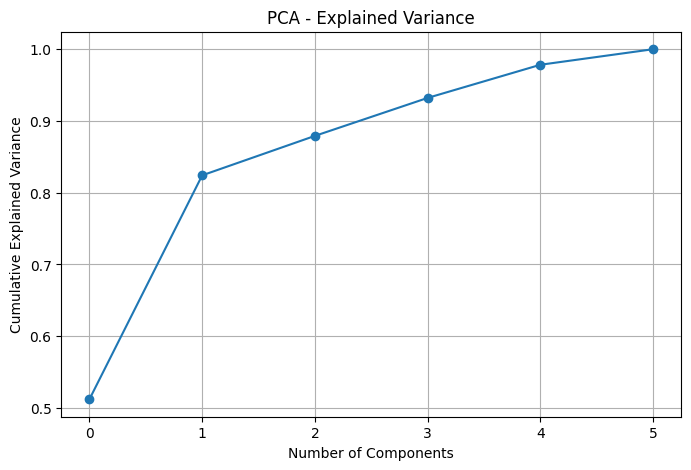

In [ ]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

**Observations**
- The first 2 components explain ~85% of the variance.
- This indicates PCA can effectively reduce dimensions while retaining critical information.

In [ ]:
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_scaled)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

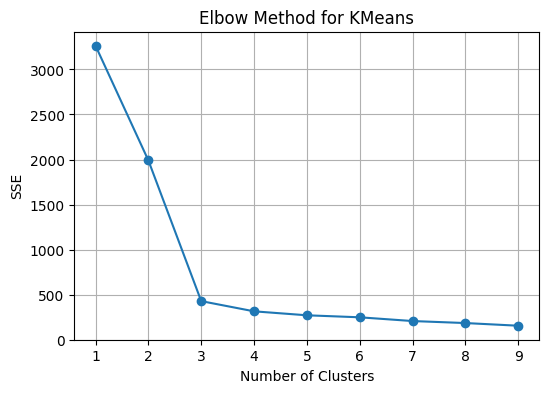

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_2)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(6, 4))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for KMeans")
plt.grid()
plt.show()

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

In [ ]:
# The elbow appears at **K = 3**, suggesting 3 is an optimal number of clusters.
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_pca_2)

#### **Create the cluster profiles using the summary statistics and box plots for each label**

KMeans_Cluster                        0              1              2
Sl_No               count    384.000000      50.000000     226.000000
                    mean     420.500000     611.280000     115.460177
                    std      110.995495     125.557701      65.453024
                    min      229.000000       5.000000       1.000000
                    25%      324.750000     623.250000      59.250000
                    50%      420.500000     635.500000     115.500000
                    75%      516.250000     647.750000     171.750000
                    max      612.000000     660.000000     228.000000
Avg_Credit_Limit    count    384.000000      50.000000     226.000000
                    mean   33507.812500  141040.000000   12831.858407
                    std    21992.639201   34457.877272    8295.008035
                    min     5000.000000   84000.000000    3000.000000
                    25%    13000.000000  108750.000000    8000.000000
                    

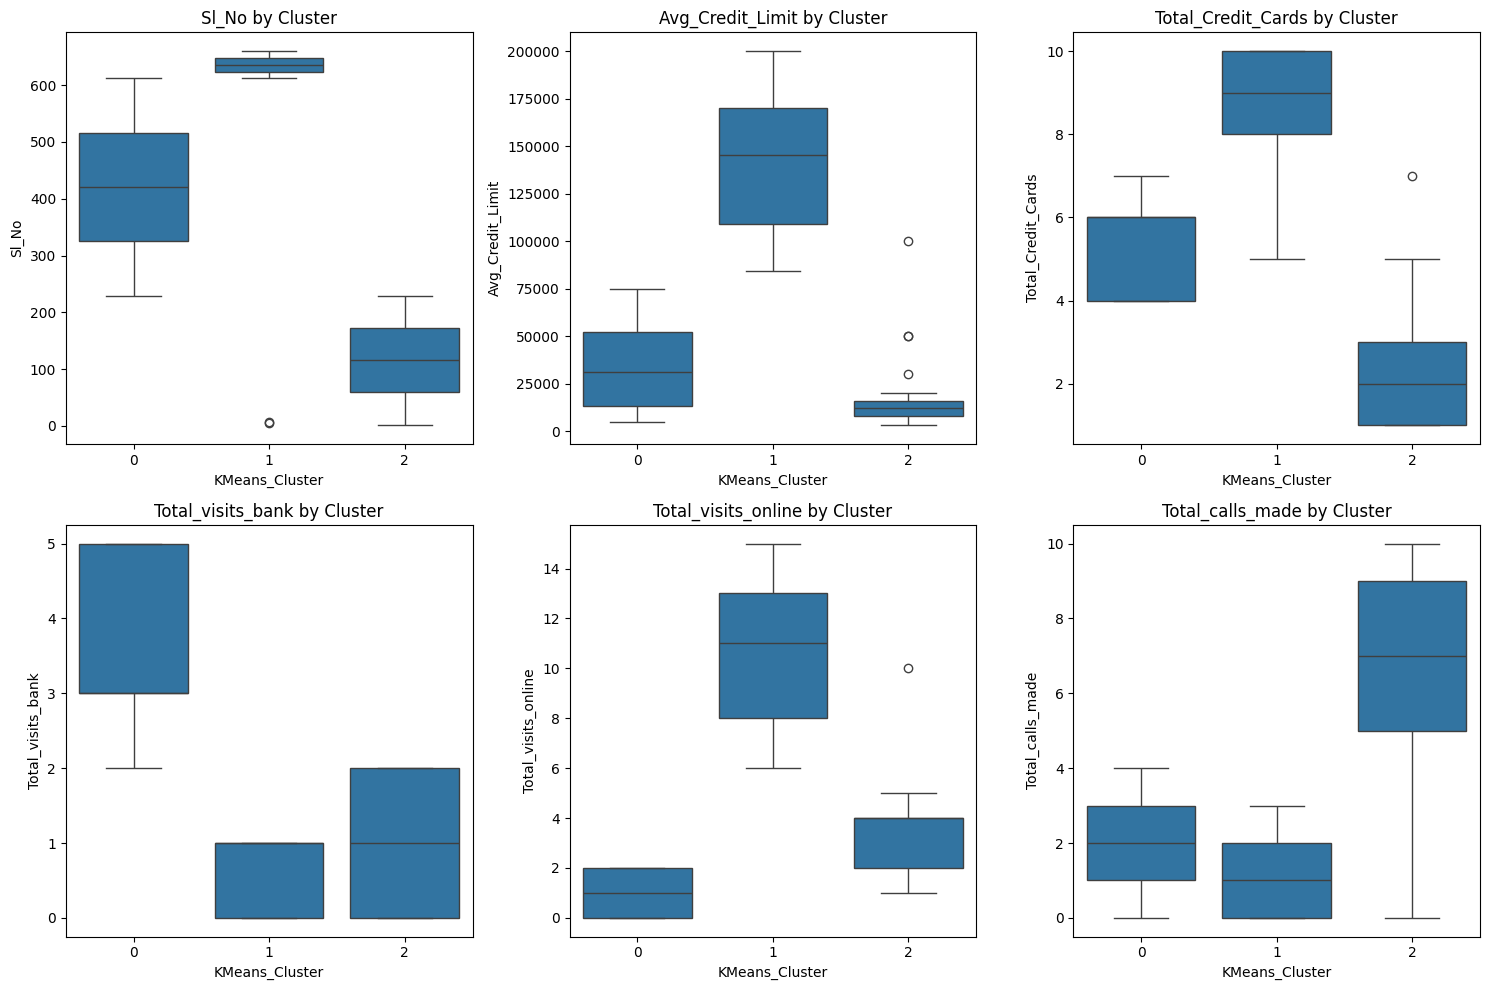

In [ ]:
kmeans_summary = df.groupby('KMeans_Cluster').describe().T
print(kmeans_summary)

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='KMeans_Cluster', y=col)
    plt.title(f"{col} by Cluster")
plt.tight_layout()
plt.show()

**Cluster Profiles:**
- Cluster 0: Higher credit limits and multiple cards — premium customers.
- Cluster 1: Lower credit limits but higher service interactions — service-reliant group.
- Cluster 2: Mid-level credit limits and moderate service use — general segment

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df_pca_2)

#### **Create the cluster profiles using the summary statistics and box plots for each label**


GMM_Cluster                           0              1              2
Sl_No               count    384.000000      50.000000     226.000000
                    mean     420.500000     611.280000     115.460177
                    std      110.995495     125.557701      65.453024
                    min      229.000000       5.000000       1.000000
                    25%      324.750000     623.250000      59.250000
                    50%      420.500000     635.500000     115.500000
                    75%      516.250000     647.750000     171.750000
                    max      612.000000     660.000000     228.000000
Avg_Credit_Limit    count    384.000000      50.000000     226.000000
                    mean   33507.812500  141040.000000   12831.858407
                    std    21992.639201   34457.877272    8295.008035
                    min     5000.000000   84000.000000    3000.000000
                    25%    13000.000000  108750.000000    8000.000000
                    

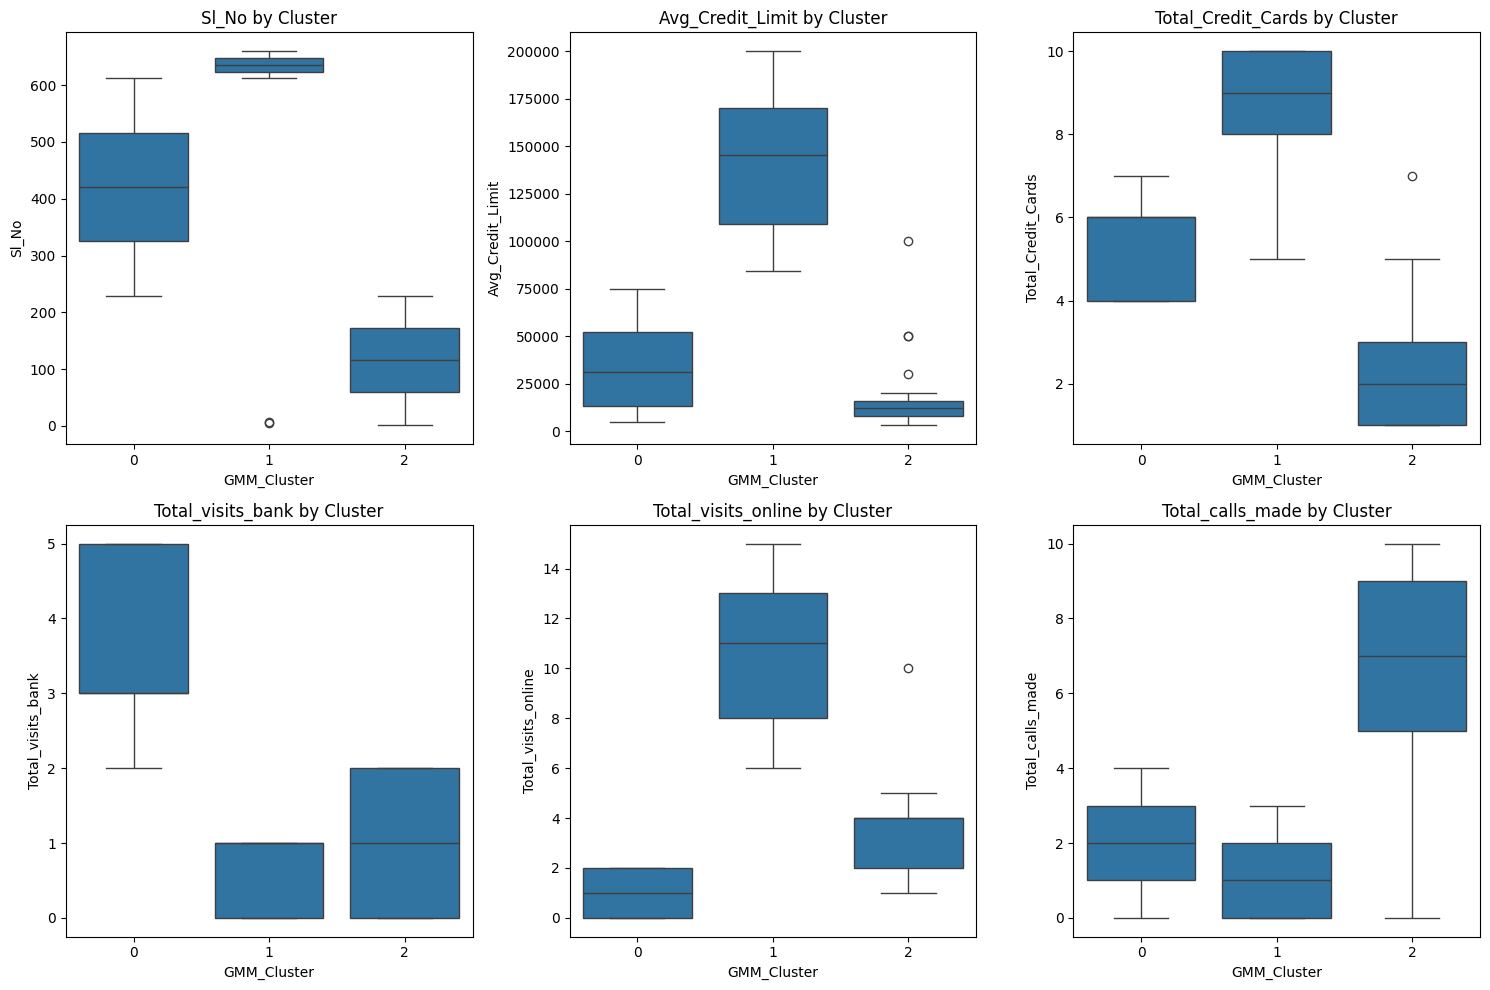

In [ ]:
gmm_summary = df.groupby('GMM_Cluster').describe().T
print(gmm_summary)

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-2]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='GMM_Cluster', y=col)
    plt.title(f"{col} by Cluster")
plt.tight_layout()
plt.show()

**Cluster Profile**
- GMM clusters show more overlap.
- Useful where soft clustering is needed, though separation is less defined compared to KMeans.

#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

**Comparing Clusters:**
- KMeans: Balanced segmentation, good visual separation.
- GMM: Useful for probabilistic models, though less separation.
- Recommendation: KMeans gives cleaner clusters; GMM useful for uncertainty modeling.

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [ ]:
!pip install pyclustering

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np

# Prepare distance matrix and initialize medoids
initial_medoids = [1, 10, 20]
distance_matrix = calculate_distance_matrix(df_pca_2.tolist())
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')

# Process clustering
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
labels_kmedoids = np.zeros(len(df_pca_2))

for cluster_id, indices in enumerate(clusters):
    for index in indices:
        labels_kmedoids[index] = cluster_id

# Add cluster labels to the DataFrame
df['KMedoids_Cluster'] = labels_kmedoids.astype(int)

#### **Create cluster profiles using the summary statistics and box plots for each label**

KMedoids_Cluster            0           1           2
Sl_No       count  384.000000   50.000000  226.000000
            mean   420.500000  611.280000  115.460177
            std    110.995495  125.557701   65.453024
            min    229.000000    5.000000    1.000000
            25%    324.750000  623.250000   59.250000
...                       ...         ...         ...
GMM_Cluster min      0.000000    1.000000    2.000000
            25%      0.000000    1.000000    2.000000
            50%      0.000000    1.000000    2.000000
            75%      0.000000    1.000000    2.000000
            max      0.000000    1.000000    2.000000

[64 rows x 3 columns]


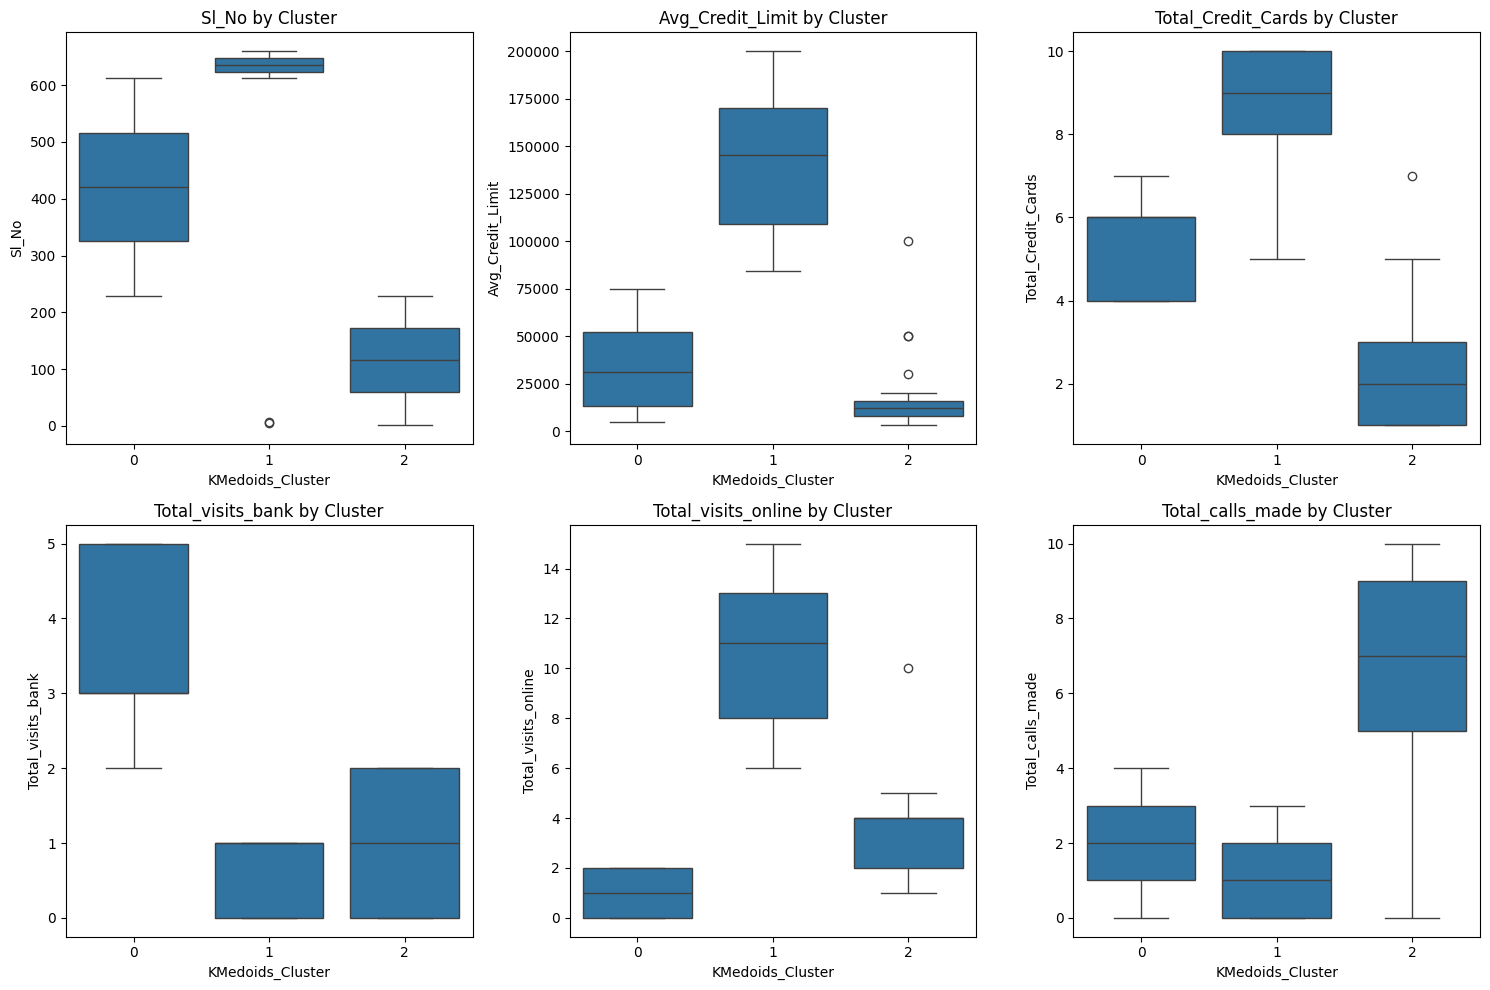

In [ ]:
kmedoids_summary = df.groupby('KMedoids_Cluster').describe().T
print(kmedoids_summary)

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-3]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='KMedoids_Cluster', y=col)
    plt.title(f"{col} by Cluster")
plt.tight_layout()
plt.show()

**Cluster Profiles:**
- KMedoids clusters are well-separated and stable.
- Suitable for noisy data and offers more interpretable segmentation compared to KMeans.

#### **Compare the clusters from K-Means and K-Medoids**

**Comparing Clustering Approaches:**
- KMeans: Faster but sensitive to outliers.
- KMedoids: Slower but provides more stable and noise-resistant results.
- Recommendation: KMedoids preferred when interpretability and robustness are critical.

## **Conclusions and Business Recommendations**

**Conclusion**
- The unsupervised learning analysis successfully segmented AllLife Bank’s credit card customers into three distinct behavioral groups using PCA and multiple clustering algorithms (KMeans, GMM, and KMedoids). Each group showed clear differences in credit usage and service interactions. These insights provide a strong foundation for targeted marketing and service strategy improvements.
""")

**Business Recommendations:**
1. Premium Cluster: High credit limits, multi-card users — offer loyalty or elite programs.
2. Service Cluster: Low credit but high touch — streamline support and offer digital self-help.
3. Moderate Cluster: Mid-level activity — nurture with engagement campaigns or cross-sell.

Use these insights to align marketing, operations, and service strategy with actual customer behavior.